In [1]:
print("Hello World!")

Hello World!


Import Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')
#plt.style.use('ggplot')
import scipy as sp
import scipy.stats as stats
%matplotlib inline
import os
from cycler import cycler

from itertools import compress 

In [3]:
#legend customizations
### Legend
#legend.loc           : best
#legend.frameon       : True     # if True, draw the legend on a background patch
#legend.framealpha    : 0.8      # legend patch transparency
#legend.facecolor     : inherit  # inherit from axes.facecolor; or color spec
#legend.edgecolor     : 0.8      # background patch boundary color
#legend.fancybox      : True     # if True, use a rounded box for the
                                 # legend background, else a rectangle
#legend.shadow        : False    # if True, give background a shadow effect
#legend.numpoints     : 1        # the number of marker points in the legend line
#legend.scatterpoints : 1        # number of scatter points
#legend.markerscale   : 1.0      # the relative size of legend markers vs. original
#legend.fontsize      : medium
# Dimensions as fraction of fontsize:
#legend.borderpad     : 0.4      # border whitespace
#legend.labelspacing  : 0.5      # the vertical space between the legend entries
#legend.handlelength  : 2.0      # the length of the legend lines
#legend.handleheight  : 0.7      # the height of the legend handle
#legend.handletextpad : 0.8      # the space between the legend line and legend text
#legend.borderaxespad : 0.5      # the border between the axes and legend edge
#legend.columnspacing : 2.0      # column separation

#plt.rcParams['legend.frameon'] = True
#plt.rcParams['legend.facecolor'] = 'white'
#plt.rcParams['legend.edgecolor'] = 'black' 

# Attempt to make the figure size better for our title
#plt.rcParams['savefig.bbox'] = 'tight'
#plt.rcParams['savefig.pad_inches'] = 0.2 #double default value

In [4]:
fname = 'skill_analysis_scratch.xlsx'
header = pd.read_excel(fname, 'Sheet1', header=None).iloc[1:3,3:].ffill(axis=1) # Take only the header info
header

data = pd.read_excel(fname, 'Sheet1', skiprows=[0,1,2], header=None) # Skip Header Rows
print(data.head())
data.iloc[:,:3] = data.iloc[:,:3].ffill()  # Replace first three columns with feed forward NAs
data = data.set_index([0,1,2]) # Set this as the new index
#data.drop(columns=[3], inplace=True)
data.columns=pd.MultiIndex.from_arrays(header.values)
data.index.names = ['Category', 'Skill', 'SkillLevel']
data
#df= data # give it a new name

                             0    1     2     3    4   5     6   7    8   \
0  Science and Mathematics (SM)  SM1  SM1i  10.0  2.0 NaN  10.0 NaN  2.0   
1                           NaN  NaN  SM1b   2.0  NaN NaN   2.0 NaN  NaN   
2                           NaN  NaN  SM1m   NaN  NaN NaN   NaN NaN  NaN   
3                           NaN  SM2  SM2i  10.0  4.0 NaN  10.0 NaN  4.0   
4                           NaN  NaN  SM2b   NaN  NaN NaN   NaN NaN  NaN   

     9   ...    40  41    42    43    44  45  46  47  48  49  
0  10.0  ...  10.0 NaN  10.0  10.0  10.0 NaN NaN NaN NaN NaN  
1   2.0  ...  10.0 NaN  10.0  10.0  10.0 NaN NaN NaN NaN NaN  
2   NaN  ...   2.0 NaN   2.0   NaN   NaN NaN NaN NaN NaN NaN  
3  10.0  ...  10.0 NaN  10.0   NaN   NaN NaN NaN NaN NaN NaN  
4   NaN  ...  10.0 NaN  10.0   NaN   NaN NaN NaN NaN NaN NaN  

[5 rows x 50 columns]


Mechanics A  \
                                                     Year1   
Category                      Skill SkillLevel               
Science and Mathematics (SM)  SM1   SM1i              10.0   
                                    SM1b               2.0   
                                    SM1m               NaN   
                              SM2   SM2i              10.0   
                                    SM2b               NaN   
...                                                    ...   
Additional General Skills (G) G3    G3i                6.0   
                                    G3                 NaN   
                                    G3m                NaN   
                              G4    G4i                NaN   
                                    G4                 NaN   

                                               Construction Technology 1  \
                                                                   Year1   
Category                      Skill SkillLevel                             
Science and Mathematics (SM)  SM1   SM1i                             2.0   
                                    SM1b                             NaN   
                                    SM1m                             NaN   
                              SM2   SM2i                             4.0   
                                    SM2b                             NaN   
...                                                                  ...   
Additional General Skills (G) G3    G3i                              6.0   
                                    G3                               NaN   
                                    G3m                              NaN   
                              G4    G4i                              NaN   
                                    G4                               NaN   

                                               Introduction to Environment  \
                                                                     Year1   
Category                      Skill SkillLevel                               
Science and Mathematics (SM)  SM1   SM1i                               NaN   
                                    SM1b                               NaN   
                                    SM1m                               NaN   
                              SM2   SM2i                               NaN   
                                    SM2b                               NaN   
...                                                                    ...   
Additional General Skills (G) G3    G3i                                NaN   
                                    G3                                 NaN   
                                    G3m                                NaN   
                              G4    G4i                                2.0   
                                    G4                                 NaN   

                                               Mathematics for Engineers and Scientists 1  \
                                                                                    Year1   
Category                      Skill SkillLevel                                              
Science and Mathematics (SM)  SM1   SM1i                                             10.0   
                                    SM1b                                              2.0   
                                    SM1m                                              NaN   
                              SM2   SM2i                                             10.0   
                                    SM2b                                              NaN   
...                                                                                   ...   
Additional General Skills (G) G3    G3i                                               6.0   
                                    G3                                                NaN 

In [5]:
#rgb colours
colours = [[[192,224,201],[151,204,165],[110,183,129],[69,163,93],[27,142,57]],
[[208,189,215],[177,145,189],[146,100,163],[115,56,137],[84,11,110]],
[[254,206,185],[254,174,139],[254,142,93],[254,110,47],[254,78,0]],
[[186,226,255],[141,207,248],[95,188,240],[50,169,233],[4,150,225]],
[[251,220,217],[248,173,192],[244,125,167],[241,78,142],[237,30,117]],
[[250,232,205],[247,218,172],[244,203,139],[241,189,106],[237,174,73]]]
for i,skill_parent in enumerate(colours):
    for j,val_range in enumerate(skill_parent):
        colours[i][j]= '#{:02X}{:02X}{:02X}FF'.format(val_range[0],val_range[1],val_range[2])
print(colours)

C = { 
'SM' : colours[0],
'EA' : colours[1],
'D'  : colours[2],
'EL' : colours[3],
'P'  : colours[4],
'G'  : colours[5]
}
for key in C:
    print(key)
    if key in 'SM1':
        print(C[key])

[['#C0E0C9FF', '#97CCA5FF', '#6EB781FF', '#45A35DFF', '#1B8E39FF'], ['#D0BDD7FF', '#B191BDFF', '#9264A3FF', '#733889FF', '#540B6EFF'], ['#FECEB9FF', '#FEAE8BFF', '#FE8E5DFF', '#FE6E2FFF', '#FE4E00FF'], ['#BAE2FFFF', '#8DCFF8FF', '#5FBCF0FF', '#32A9E9FF', '#0496E1FF'], ['#FBDCD9FF', '#F8ADC0FF', '#F47DA7FF', '#F14E8EFF', '#ED1E75FF'], ['#FAE8CDFF', '#F7DAACFF', '#F4CB8BFF', '#F1BD6AFF', '#EDAE49FF']]
SM
['#C0E0C9FF', '#97CCA5FF', '#6EB781FF', '#45A35DFF', '#1B8E39FF']
EA
D
EL
P
G


['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'EA1', 'EA2', 'EA3', 'EA4', 'EA5', 'EA6', 'EL1', 'EL2', 'EL3', 'EL4', 'EL5', 'EL6', 'EL7', 'G1', 'G2', 'G3', 'G4', 'P1', 'P10', 'P11', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'SM1', 'SM2', 'SM3', 'SM4', 'SM5', 'SM6']
SM
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True]
['SM1o', 'SM2o', 'SM3o', 'SM4o', 'SM5o', 'SM6o']
EA
[False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
['EA1o', 'EA2o', 'EA3o', 'EA4o', 'EA5o', 'EA6o']
D
[True, True, True, True, True, True, True,

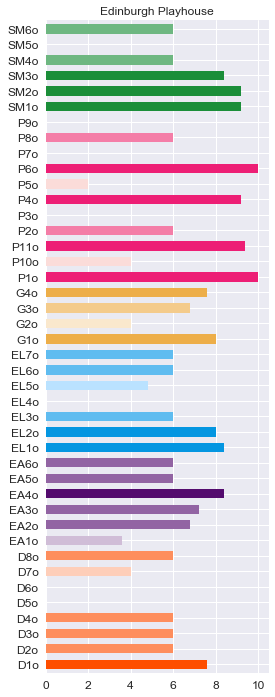

SM
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True]
['SM1o', 'SM2o', 'SM3o', 'SM4o', 'SM5o', 'SM6o']
EA
[False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
['EA1o', 'EA2o', 'EA3o', 'EA4o', 'EA5o', 'EA6o']
D
[True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
['D1o', 'D2o', 'D3o', 'D4o', 

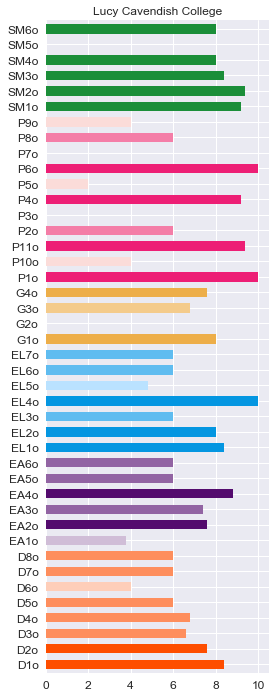

SM
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True]
['SM1o', 'SM2o', 'SM3o', 'SM4o', 'SM5o', 'SM6o']
EA
[False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
['EA1o', 'EA2o', 'EA3o', 'EA4o', 'EA5o', 'EA6o']
D
[True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
['D1o', 'D2o', 'D3o', 'D4o', 

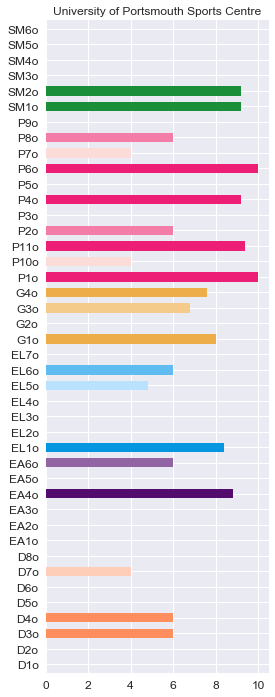

SM
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True]
['SM1o', 'SM2o', 'SM3o', 'SM4o', 'SM5o', 'SM6o']
EA
[False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
['EA1o', 'EA2o', 'EA3o', 'EA4o', 'EA5o', 'EA6o']
D
[True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
['D1o', 'D2o', 'D3o', 'D4o', 

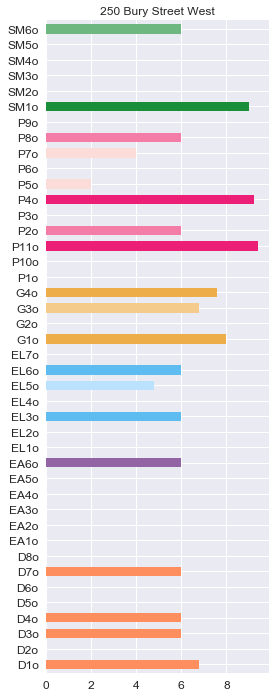

In [7]:
#DataFrame without multi-index is a bit simpler
df_si =  pd.read_excel(fname, 'Sheet1', skiprows=[0,2], index_col=2, header=0)
df_si.drop(columns=['Unnamed: 0','Unnamed: 1'], inplace=True)

dft = df_si.transpose()
#Very Manual Example
#print(dft['SM1i'].fillna(0.0).values)
#print(dft['SM1b'].fillna(0.0).values)
#print(dft['SM1m'].fillna(0.0).values)
#print(dft['SM1i'].fillna(0.0).values*(6/10) + dft['SM1b'].fillna(0.0).values*(3/10) + dft['SM1m'].fillna(0.0).values*(1/10))
#dft['SM1o'] = dft['SM1i'].fillna(0.0).values*(6/10) + dft['SM1b'].fillna(0.0).values*(3/10) + dft['SM1m'].fillna(0.0).values*(1/10)
#dft['SM1o'].plot(kind='barh')

proj_l = [ 'Edinburgh Playhouse','Lucy Cavendish College','University of Portsmouth Sports Centre','250 Bury Street West']
#'Year1', 'Year2','Year3','Year4','Year5' ARE in the xcel sheet, but we ignored it for simpicity. TODO: Add it in. 
#Changes where the bands are for each skill
weights = [[1.0], [0.6,0.4], [0.6,0.3,0.1]]
df_skill = pd.read_excel(fname, 'Sheet1', skiprows=[0,1,2], header=None).iloc[:,1].ffill()
skill_l = list(set(df_skill.values))
skill_l.sort()
print(skill_l)

for skill in skill_l:
    skill_levels = df_si[df_si.index.str.match(pat=skill+'([a-z])?$', case=False )].index
    num_skill_levels = len(skill_levels)
    # dot product to multiply and sum weights to skill level set
    #print('ThisSkill'+skill)
    #print('Filled0z{}'.format((dft[skill_levels])))
    #print('weights={}'.format(weights[num_skill_levels-1]))
    dft[skill+'o'] = np.dot(dft[skill_levels].fillna(0.0).values, weights[num_skill_levels-1])

    
for proj in proj_l:
    skill_vals = [skill+'o' for skill in skill_l]

    for key in C:
        print(key)
        skillbool = [key in skill+'o' for skill in skill_l]
        print(skillbool)
        skill_famv = list(compress(skill_vals, skillbool))
        print(skill_famv)
        
        #skill_vals = [skill+'o' for skill in skill_l]
        #print([(dft[skill_vals]>=3.0) & (dft[skill_vals]<7.5)])
        dft[dft[skill_famv]>=7.5][skill_vals].transpose()[proj].plot(
            kind='barh', title=proj,color=C[key][4], fontsize=12, width=0.6, figsize=(4,12)
        )
        dft[(dft[skill_famv]>=3.0) & (dft[skill_famv]<7.5)][skill_vals].transpose()[proj].plot(
            kind='barh', title=proj,color=C[key][2], fontsize=12, width=0.6
        )
        dft[dft[skill_famv]<5.0][skill_vals].transpose()[proj].plot(
            kind='barh', title=proj,color=C[key][0], fontsize=12, width=0.6,
        )
    plt.savefig('plots/{}_skill_map.svg'.format(proj))
    plt.show()
